## Data Mining Project - Car Resale Marketplace
----

#### Project Advisor: Prof. Arindam Ray
#### Team Name: Beta Busters
#### Team Members: 
> 1. Amolika Godse 
> 2. Anuraag Gujje 
> 3. Ganesh Talluri 
> 4. Sai Sudheer Vishnumolakala 
> 5. Suraj Shiva Kumar
----

### Data Cleansing and Analysis Notebook
----

### Problem Statement

We propose a data mining project to create a car resale marketplace that enables users to sell and buy resale cars. The key objectives of this project are as follows:

1. Predict the resale price of cars based on their features, helping sellers set competitive prices.

2. Recommend similar cars to potential buyers based on their preferences.


#### 1) Import Libraries

> Importing all the required libraries
> 1. Pandas is used for data handling, NumPy for numerical operations
> 2. Matplotlib for creating plots, Seaborn for enhancing visualizations with style.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 2) Data Loading

> Loading the master data into Pandas Dataframe (df)

In [69]:
df = pd.read_excel('master_data.xlsx',index_col=0)

In [70]:
df.head()

,price,type,make,year,model,mileage_miles,Exterior Color,Interior Color,Body Style,Doors,...,Lane Assist,Parking Assist System,Stability Control,Adaptive Cruise Control,Alloy Wheels,Cooled Seats,Full Self-Driving Capability,Third Row Seating,Tow Hitch / Package,Rear Seat Entertainment
0,32589,sedan,subaru,2022.0,wrx,14172.0,White,Black,Sedan,4 Doors,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,32589,sedan,audi,2022.0,a3,7729.0,Silver,Black,Sedan,4 Doors,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,48589,sedan,bmw,2023.0,5 series,25001.0,Blue,Brown,Sedan,4 Doors,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24589,sedan,hyundai,2023.0,elantra,8677.0,Red,Gray,Sedan,4 Doors,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23999,sedan,hyundai,2023.0,elantra,16506.0,Blue,Black,Sedan,4 Doors,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 3) Exploratory Data Analysis

> Checking the shape of the DataFrame to understand its dimensions (rows, columns)

In [71]:
df.shape

(2897, 50)

- Our raw Dataframe has 2897 rows and 50 columns in it

####   &nbsp;&nbsp;  3.1) Standardizing column names and Removing Duplicate records in the data

> Cleaning and standardizing column names by making them lowercase, replacing slashes and spaces with underscores, and removing leading/trailing spaces

In [72]:
df.columns = [col.lower().replace(' / ','_').replace(' ', '_').strip() for col in df.columns]

In [73]:
df.columns

Index(['price', 'type', 'make', 'year', 'model', 'mileage_miles',
       'exterior_color', 'interior_color', 'body_style', 'doors', 'mpg', 'vin',
       'engine', 'transmission', 'drive_type', 'fuel', 'tank_size',
       'bed_style', 'cab_style', 'android_auto', 'apple_carplay',
       'backup_camera_assist', 'bluetooth', 'heated_seats',
       'hill_assist_system', 'keyless_entry', 'keyless_ignition',
       'multimedia_telematics', 'premium_sound_system', 'satellite_radio',
       'sunroof_moonroof', 'leather_seats', 'power_seats', 'traction_control',
       'driver_assistance_confidence_pkg', 'head-up_display',
       'lane_departure_warning', 'navigation_system', 'remote_start',
       'blind_spot_monitor', 'lane_assist', 'parking_assist_system',
       'stability_control', 'adaptive_cruise_control', 'alloy_wheels',
       'cooled_seats', 'full_self-driving_capability', 'third_row_seating',
       'tow_hitch_package', 'rear_seat_entertainment'],
      dtype='object')

> Check & Remove Duplicates

In [74]:
df.duplicated().sum()

9

In [75]:
df = df.drop_duplicates()
df.shape

(2888, 50)

> Converting the entire DataFrame to lowercase to eliminate redundant categories in a feature due to case difference

In [76]:
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

####   &nbsp;&nbsp;  3.2) checking and Dealing with Missing values in Dataframe

In [77]:
df.isnull().sum()

price                                  0
type                                   0
make                                   1
year                                   1
model                                  1
mileage_miles                          1
exterior_color                         4
interior_color                        16
body_style                             1
doors                                  1
mpg                                    1
vin                                    1
engine                                 1
transmission                           1
drive_type                             1
fuel                                   1
tank_size                           1962
bed_style                           2644
cab_style                           2534
android_auto                        1536
apple_carplay                       1471
backup_camera_assist                  71
bluetooth                           1058
heated_seats                        1208
hill_assist_syst

In [78]:
df = df.dropna(subset=['make'])

In [79]:
binary = ['android_auto', 'apple_carplay', 'backup_camera_assist', 'bluetooth', 'heated_seats',
          'hill_assist_system', 'keyless_entry', 'keyless_ignition', 'multimedia_telematics', 'premium_sound_system',
          'satellite_radio', 'sunroof_moonroof', 'leather_seats', 'power_seats', 'traction_control',
          'driver_assistance_confidence_pkg', 'head-up_display', 'lane_departure_warning', 'navigation_system',
          'remote_start', 'blind_spot_monitor', 'lane_assist', 'parking_assist_system', 'stability_control', 
          'adaptive_cruise_control', 'alloy_wheels', 'cooled_seats', 'full_self-driving_capability',
          'third_row_seating', 'tow_hitch_package', 'rear_seat_entertainment']

- Replacing all Null values in `binary` with 0

In [80]:
df[binary] = df[binary].fillna(0)

- `tank_size` , `bed_style` and `cab_style` have null values for almost 60-70% of the data, so we are dropping them

In [81]:
df = df.drop(columns=['tank_size', 'bed_style', 'cab_style'],axis=1)

In [82]:
df.isnull().sum()

price                                0
type                                 0
make                                 0
year                                 0
model                                0
mileage_miles                        0
exterior_color                       3
interior_color                      15
body_style                           0
doors                                0
mpg                                  0
vin                                  0
engine                               0
transmission                         0
drive_type                           0
fuel                                 0
android_auto                         0
apple_carplay                        0
backup_camera_assist                 0
bluetooth                            0
heated_seats                         0
hill_assist_system                   0
keyless_entry                        0
keyless_ignition                     0
multimedia_telematics                0
premium_sound_system     

####   &nbsp;&nbsp;  3.3) Checking for Redundancy in the data and dropping unnecessary columns

In [83]:
# Checking type and bodystyle columns
print(f"Unique values in type: {df['type'].unique()}")
print(f"Unique values in body_style: {df['body_style'].unique()}")

Unique values in type: ['sedan' 'supuv' 'wagon' 'coupe' 'minivan' 'pickups' 'hatchback'
 'convertible']
Unique values in body_style: ['sedan' 'suv' 'wagon' 'coupe' 'minivan' 'pickup' 'hatchback'
 'convertible']


- Dropping `body_style` as it is similar to `type`

In [84]:
df = df.drop('body_style',axis=1)

> Checking for similarity in `binary` columns

In [85]:
df[binary].corr()

,android_auto,apple_carplay,backup_camera_assist,bluetooth,heated_seats,hill_assist_system,keyless_entry,keyless_ignition,multimedia_telematics,premium_sound_system,...,lane_assist,parking_assist_system,stability_control,adaptive_cruise_control,alloy_wheels,cooled_seats,full_self-driving_capability,third_row_seating,tow_hitch_package,rear_seat_entertainment
android_auto,1.000000,0.951724,0.129890,0.180115,-0.020764,0.175402,0.145923,0.109348,0.117845,-0.153976,...,0.374990,0.030861,-0.210616,0.211887,-0.082811,-0.110045,-0.017470,-0.108890,-0.047124,-0.000912
apple_carplay,0.951724,1.000000,0.136750,0.193875,-0.030313,0.148871,0.171902,0.119652,0.140767,-0.162878,...,0.397823,0.028973,-0.205383,0.249824,-0.089985,-0.115882,-0.018276,-0.119083,-0.059058,-0.003939
backup_camera_assist,0.129890,0.136750,1.000000,-0.012288,0.044443,-0.030342,-0.004695,0.022285,0.023340,-0.025208,...,0.088266,0.035754,-0.101421,0.059458,-0.024624,0.004044,0.002934,-0.015005,-0.075419,0.010602
bluetooth,0.180115,0.193875,-0.012288,1.000000,-0.001329,0.100288,0.067101,0.093922,-0.060248,-0.097342,...,-0.040303,-0.048269,-0.043699,-0.039328,0.049512,-0.121868,0.014147,-0.051012,-0.111689,-0.013321
heated_seats,-0.020764,-0.030313,0.044443,-0.001329,1.000000,0.005538,-0.034130,0.227886,-0.139798,0.123029,...,0.017209,0.147812,-0.247371,0.101206,-0.029053,0.113666,0.015778,0.016152,-0.210617,0.015052
hill_assist_system,0.175402,0.148871,-0.030342,0.100288,0.005538,1.000000,0.010638,0.046167,-0.020616,-0.054545,...,-0.002289,0.023340,0.045915,-0.124016,-0.022458,-0.026823,-0.014939,0.022032,0.005077,-0.011582
keyless_entry,0.145923,0.171902,-0.004695,0.067101,-0.034130,0.010638,1.000000,0.173917,0.423856,0.042675,...,0.004673,-0.046534,0.231007,0.085330,-0.156125,0.109096,-0.020857,-0.175865,-0.002445,-0.044116
keyless_ignition,0.109348,0.119652,0.022285,0.093922,0.227886,0.046167,0.173917,1.000000,0.144579,0.061829,...,0.035186,0.088450,-0.132775,0.112477,-0.001893,0.043987,-0.024060,-0.089273,-0.158292,-0.012104
multimedia_telematics,0.117845,0.140767,0.023340,-0.060248,-0.139798,-0.020616,0.423856,0.144579,1.000000,0.099230,...,-0.001847,0.075902,0.199659,0.091246,-0.045656,0.059523,0.014306,-0.104000,0.081408,-0.044682
premium_sound_system,-0.153976,-0.162878,-0.025208,-0.097342,0.123029,-0.054545,0.042675,0.061829,0.099230,1.000000,...,-0.126738,0.070488,0.008740,-0.026050,-0.020827,-0.004234,-0.008385,-0.040644,0.043108,-0.016481


- Dropping `android_auto` as it is almsot similar to `apple_carplay`

In [86]:
df = df.drop('android_auto',axis=1)

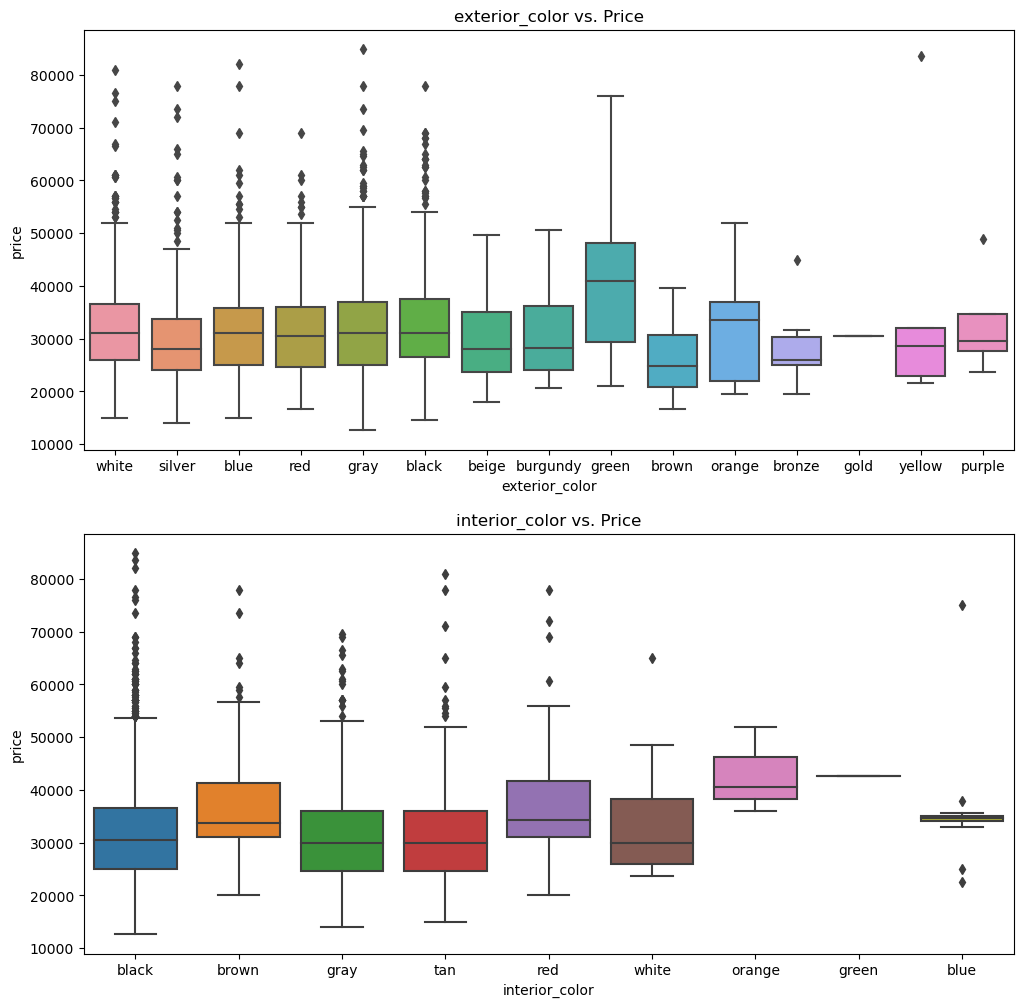

In [87]:
# Color Features vs Price BoxPlot
color_cols = ['exterior_color', 'interior_color']

plt.figure(figsize=(12,12))
for feature in color_cols:
    plt.subplot(2, 1, color_cols.index(feature) + 1)
    sns.boxplot(data=df, x=feature, y='price')
    plt.title(f'{feature} vs. Price')
plt.show()

- #### Dropping the color features

We are removing the "color" features from the dataset as it has been observed that color does not have a substantial impact on the variation in car prices. This is done to simplify the dataset and focus on more relevant factors affecting resale price values.

In [88]:
df = df.drop(columns=['exterior_color', 'interior_color'],axis=1)

- #### Dropping the VIN

The "Vehicle Identification Number" (VIN) is a unique identifier for each car and does not provide meaningful insights for our analysis. Therefore, we are dropping this column.

In [89]:
df = df.drop(columns=['vin'],axis=1)

####   &nbsp;&nbsp;  3.4) Feature Engineering

 > Split the "mpg" column and extract city_mpg and hwy_mpg.

In [90]:
df[['city_mpg', 'hwy_mpg']] = df['mpg'].str.split(' / ', expand=True)

df = df.drop(columns=['mpg'])

In [91]:
df['city_mpg'] = df['city_mpg'].str.extract('(\d+)').astype(float)
df['hwy_mpg'] = df['hwy_mpg'].str.extract('(\d+)').astype(float)

# Grouping by 'model' and calculate the median for each group
median_city_mpg = df.groupby('model')['city_mpg'].transform('median')
median_hwy_mpg = df.groupby('model')['hwy_mpg'].transform('median')

# Using these median values to fill the NaNs in the original dataframe
df['city_mpg'] = df['city_mpg'].fillna(median_city_mpg)
df['hwy_mpg'] = df['hwy_mpg'].fillna(median_hwy_mpg)

# If there are still NaNs because the model itself didn't have any non-NaN mpg values,
# we can fill them with a global median or some other statistic.
global_median_city_mpg = df['city_mpg'].median()
global_median_hwy_mpg = df['hwy_mpg'].median()

df['city_mpg'] = df['city_mpg'].fillna(global_median_city_mpg)
df['hwy_mpg'] = df['hwy_mpg'].fillna(global_median_hwy_mpg)

In [92]:
df[['city_mpg','hwy_mpg']].corr()

,city_mpg,hwy_mpg
city_mpg,1.000000,0.926777
hwy_mpg,0.926777,1.000000


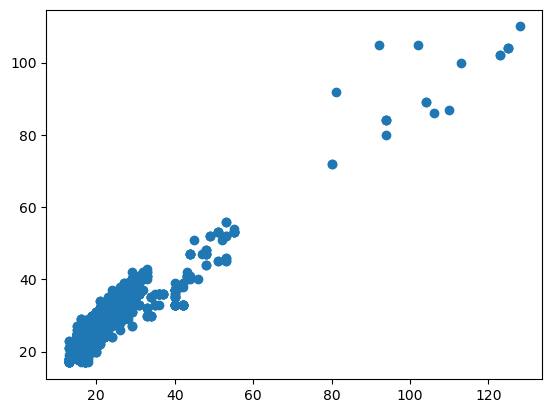

In [93]:
plt.scatter(df['city_mpg'],df['hwy_mpg'])

- Combining the city and highway mpg into `avg_mpg`

In [94]:
df['avg_mpg'] = (df['city_mpg'] + df['hwy_mpg'])/2

df = df.drop(columns=['city_mpg','hwy_mpg'])

> converting the `doors` from string to int type

In [95]:
df['doors'] = df['doors'].str.replace('doors', '').str.strip()
df['doors'].value_counts()

4    2645
2     239
3       3
Name: doors, dtype: int64

In [96]:
df = df.rename(columns={'mileage_miles': 'miles_driven'})

In [97]:
num_features = ['miles_driven', 'avg_mpg']
cat_features_label = ['type', 'make', 'model', 'transmission', 'drive_type', 'fuel', 'engine']
cat_features_ordinal = ['year', 'doors']

In [98]:
bin_features = ['apple_carplay', 'backup_camera_assist', 'bluetooth', 'heated_seats',
                'hill_assist_system', 'keyless_entry', 'keyless_ignition', 'multimedia_telematics', 'premium_sound_system',
                'satellite_radio', 'sunroof_moonroof', 'leather_seats', 'power_seats', 'traction_control',
                'driver_assistance_confidence_pkg', 'head-up_display', 'lane_departure_warning', 'navigation_system',
                'remote_start', 'blind_spot_monitor', 'lane_assist', 'parking_assist_system', 'stability_control', 
                'adaptive_cruise_control', 'alloy_wheels', 'cooled_seats', 'full_self-driving_capability',
                'third_row_seating', 'tow_hitch_package', 'rear_seat_entertainment']

In [99]:
df.to_csv('cleansed_master_data.csv', index=False)

-----

####   &nbsp;&nbsp;  3.5) Data Analysis

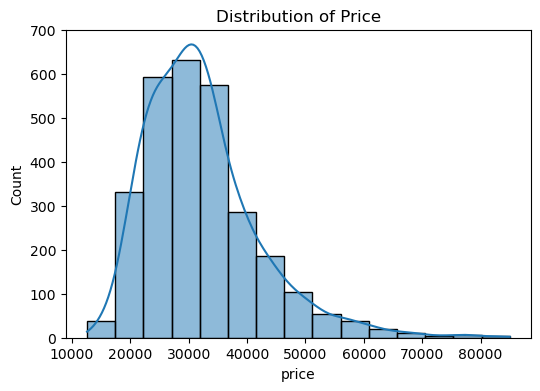

In [100]:
# Price Distribution
plt.figure(figsize=(6, 4))
sns.histplot(data=df['price'], bins=15, kde=True)
plt.title('Distribution of Price')
plt.show()


1. **Central Tendency:**
   - The distribution of prices seems to be unimodal, with the peak around the 20,000 to 30,000 dollars price range, suggesting this is where the majority of the car prices are clustered.
   - This indicates that the most common resale prices for cars in this marketplace fall within this range, and it could be considered the 'average' market price range for used cars in the dataset.

2. **Spread and Variability:**
   - The price distribution appears to be right-skewed (positive skew), meaning there are a few cars with very high prices pulling the average to the right, but the bulk of the cars are concentrated in the lower to mid-price range.
   - This skewness could suggest that while there is a market for high-end resale cars, the volume of transactions is likely dominated by more affordably priced vehicles.

3. **Outliers and High-Value Segment:**
   - There are a significant number of cars beyond the 50,000 dollar mark, which could represent a luxury segment in the resale market. These outliers could significantly affect the average price if not accounted for separately.

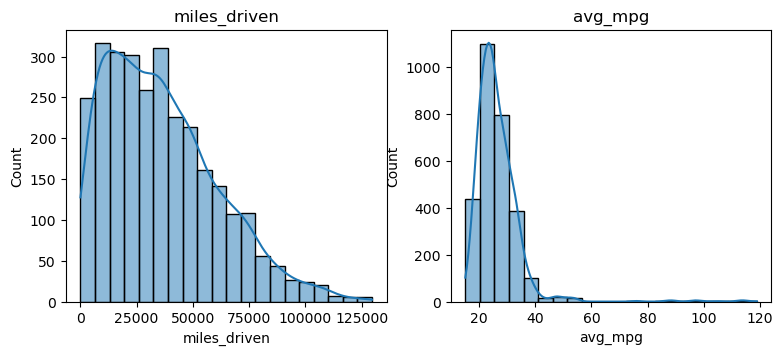

In [101]:
# Distribution of Numerical Features
plt.figure(figsize=(24, 12))
for feature in num_features:
    plt.subplot(3, 5, num_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.show()

The two histograms present the distributions of 'miles_driven' and 'avg_mpg' for a collection of vehicles:

1. 'miles_driven' shows a right-skewed distribution, indicating most cars have lower mileage, with fewer vehicles having very high mileage.
2. The 'avg_mpg' histogram is bimodal, suggesting two common groups of fuel efficiency among cars, one around 20-30 mpg and another peak near 50 mpg.
3. The decline in counts for higher 'miles_driven' could affect resale value, as higher mileage often correlates with lower prices.
4. The bimodality in 'avg_mpg' may reflect different vehicle types, such as gasoline versus hybrid cars, which can impact buyer preference and price.

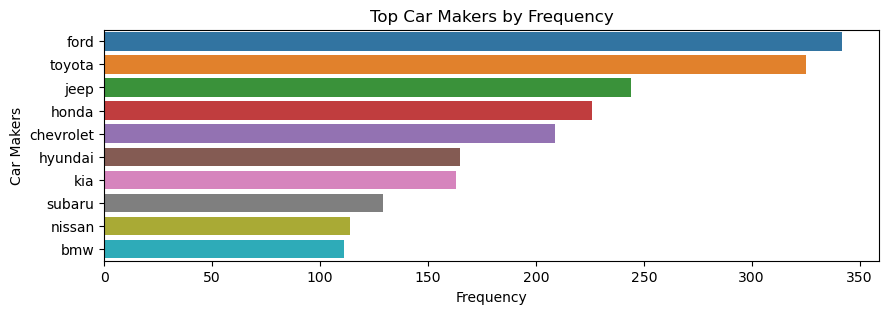

In [102]:
#Top car makers by frequency
n = 10
top_makers = df['make'].value_counts().head(n)

plt.figure(figsize=(10, 3))
sns.barplot(x=top_makers.values, y=top_makers.index)
plt.xlabel('Frequency')
plt.ylabel('Car Makers')
plt.title(f'Top Car Makers by Frequency')
plt.show()

Ford and Toyota are the most frequently listed car makers in the dataset, suggesting a strong market presence or popularity, which could influence resale value dynamics. Brands like BMW show less frequency, which could point to a more niche market or potentially higher resale values due to rarity.

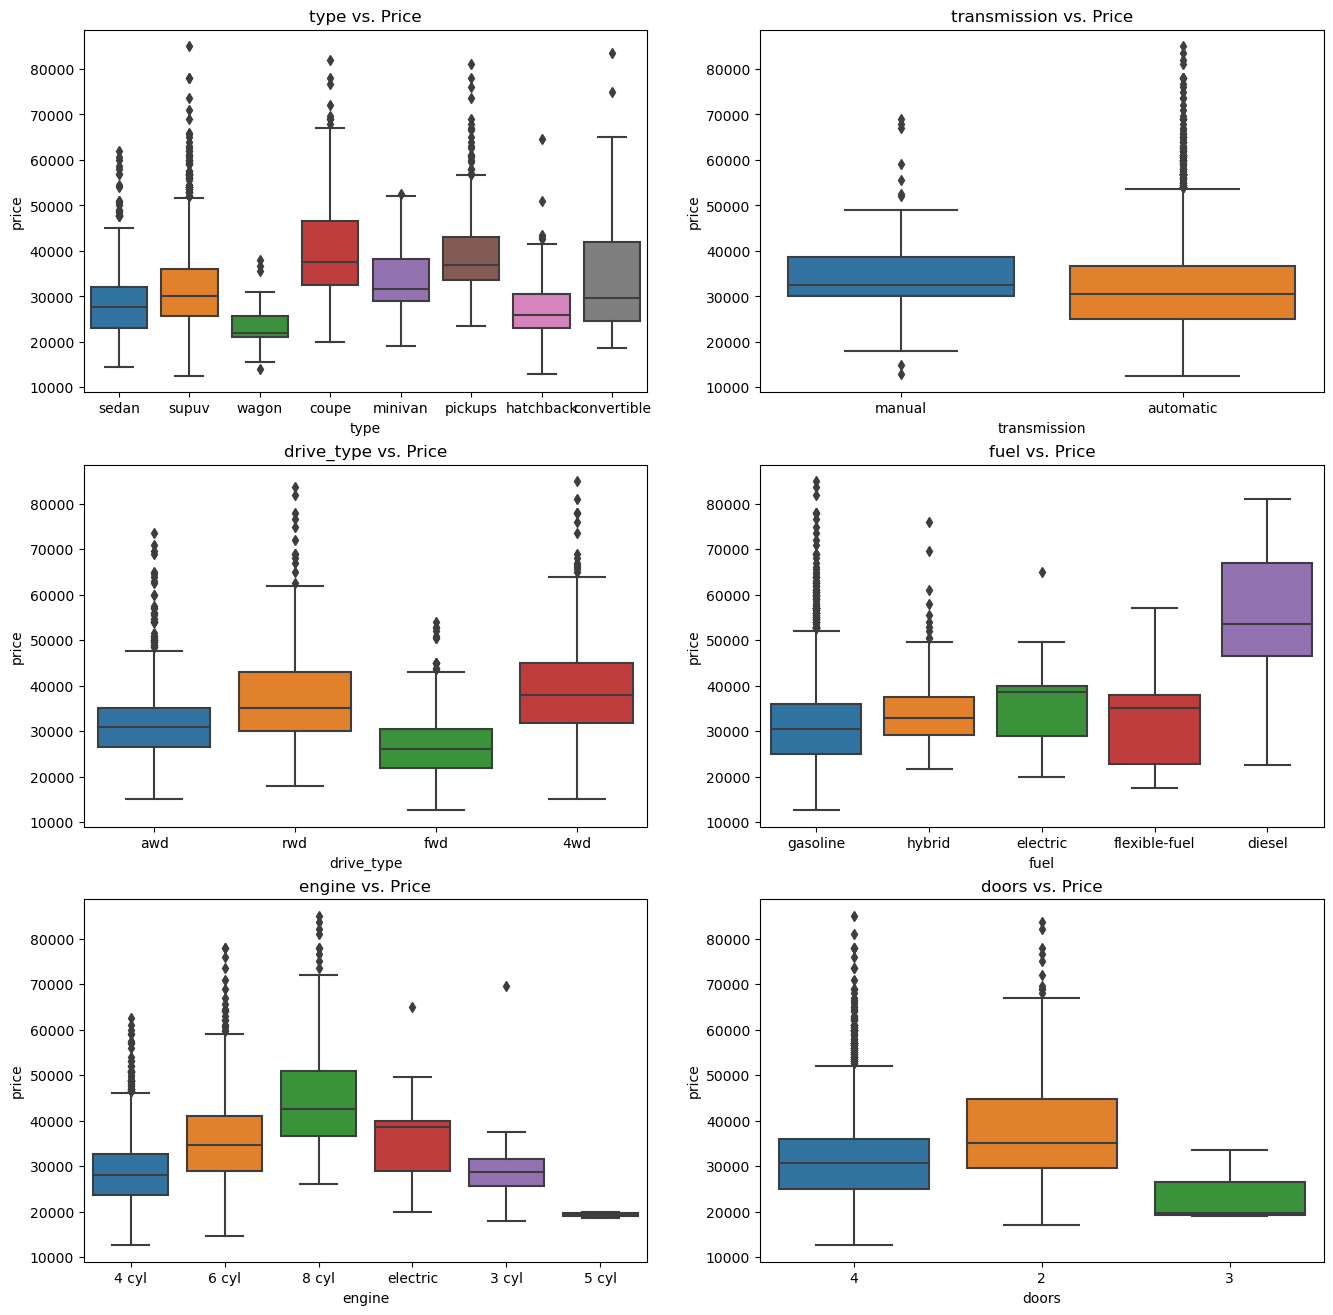

In [103]:
# Categorical Features vs Price BoxPlots
cat_cols = ['type', 'transmission', 'drive_type', 'fuel', 'engine', 'doors']

plt.figure(figsize=(16, 16))
for feature in cat_cols:
    plt.subplot(3, 2, cat_cols.index(feature) + 1)
    sns.boxplot(data=df, x=feature, y='price')
    plt.title(f'{feature} vs. Price')
plt.show()

This series of box plots displays the distribution of car prices against various features:

1. **Type vs. Price**: Convertibles and pickups tend to have a higher median price compared to other vehicle types, such as sedans and hatchbacks. Wagons, coupes, and SUVs have a moderate price range.

2. **Transmission vs. Price**: Cars with automatic transmission generally have a higher median price than those with manual transmission.

3. **Drive Type vs. Price**: Four-wheel drive (4wd) vehicles show a higher median price compared to all-wheel drive (awd), rear-wheel drive (rwd), and front-wheel drive (fwd) options, indicating that 4wd might be a premium feature.

4. **Fuel vs. Price**: Electric and diesel vehicles exhibit a higher median price point, suggesting that these fuel types might be associated with either newer technology or more expensive models. Hybrid and gasoline cars have a similar and lower median price range, with flexible-fuel vehicles overlapping across a broad price spectrum.

5. **Engine vs. Price**: Eight-cylinder (8 cyl) engines command the highest median prices, which is often associated with more power and possibly luxury or sports cars. Six-cylinder (6 cyl) and four-cylinder (4 cyl) engines follow, with electric engines showing a wide price range, potentially due to varying levels of technology and performance in electric vehicles. Three-cylinder (3 cyl) and five-cylinder (5 cyl) engines are less common and exhibit lower median prices.

6. **Doors vs. Price**: Cars with four doors tend to have a higher median price than those with two or three doors, which may reflect their larger size or family-oriented design.

The spread of data points beyond the upper and lower quartiles, represented by the "whiskers" and outliers (dots), indicates variance in pricing within each category that could be due to additional features, brand value, or other market factors not captured by the box plots.

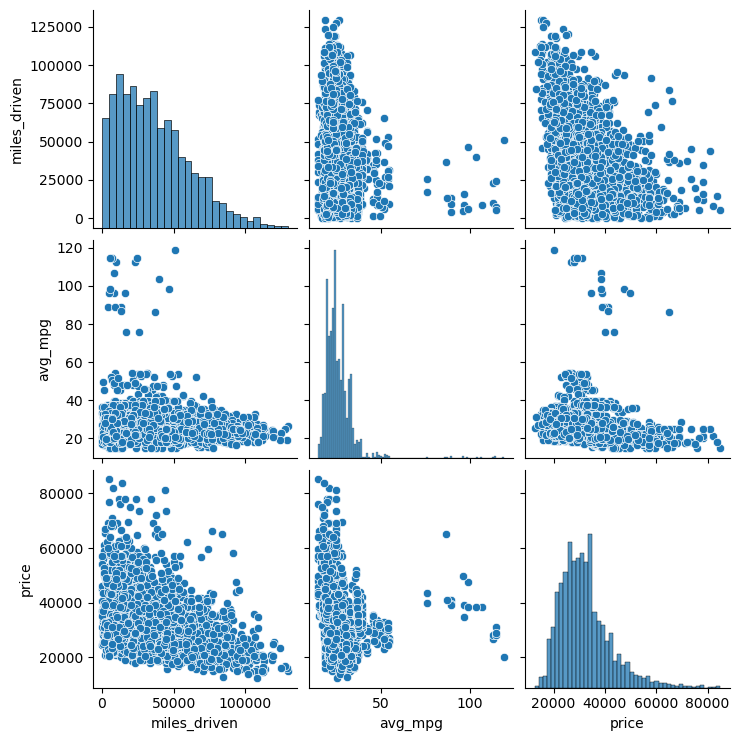

In [104]:
# Pairplot for numerical features
sns.pairplot(data=df[num_features + ['price']])
plt.show()

matrix of scatter plots and histograms, commonly used in exploratory data analysis.

1. **Miles Driven:**
   - The histogram for miles_driven shows that most cars have a mileage lower than 50,000 miles, with the distribution tailing off as mileage increases.
   - There's a moderate negative relationship between miles_driven and price, as seen in the scatter plot. This suggests that cars with lower mileage tend to be priced higher, which is typical in the used car market.

2. **Average Miles Per Gallon (avg_mpg):**
   - The avg_mpg histogram shows that the distribution is somewhat bimodal, with peaks around 20-30 mpg and another smaller peak around 50 mpg. This could reflect different types of cars, such as gas-powered vs. hybrid/electric vehicles.
   - The scatter plot between avg_mpg and price does not indicate a clear trend, suggesting that fuel efficiency is not a strong determinant of price in this dataset or that it affects different segments of cars differently.

3. **Price:**
   - The price histogram is right-skewed, indicating that most cars are clustered at the lower price end, with fewer cars having very high prices.
   - There's no clear linear relationship between price and avg_mpg, but there is a pattern where cars at both the lower and higher ends of fuel efficiency seem to have a wide range of prices.

4. **Relationship between Miles Driven and Avg MPG:**
   - The scatter plot between miles_driven and avg_mpg does not show a definitive pattern, indicating there's no strong direct relationship between how much a car has been driven and its fuel efficiency in this dataset.

Overall, this dataset displays the expected negative correlation between miles_driven and price and a more complex, non-linear relationship between avg_mpg and price. There's also an indication of different vehicle types based on fuel efficiency, which does not seem to correlate directly with either price or miles driven in a simple manner. The bimodality of the avg_mpg distribution is particularly interesting and could be a starting point for segmentation or further analysis.

C:\Users\ANURAAG\AppData\Local\Temp\ipykernel_5480\1056032363.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


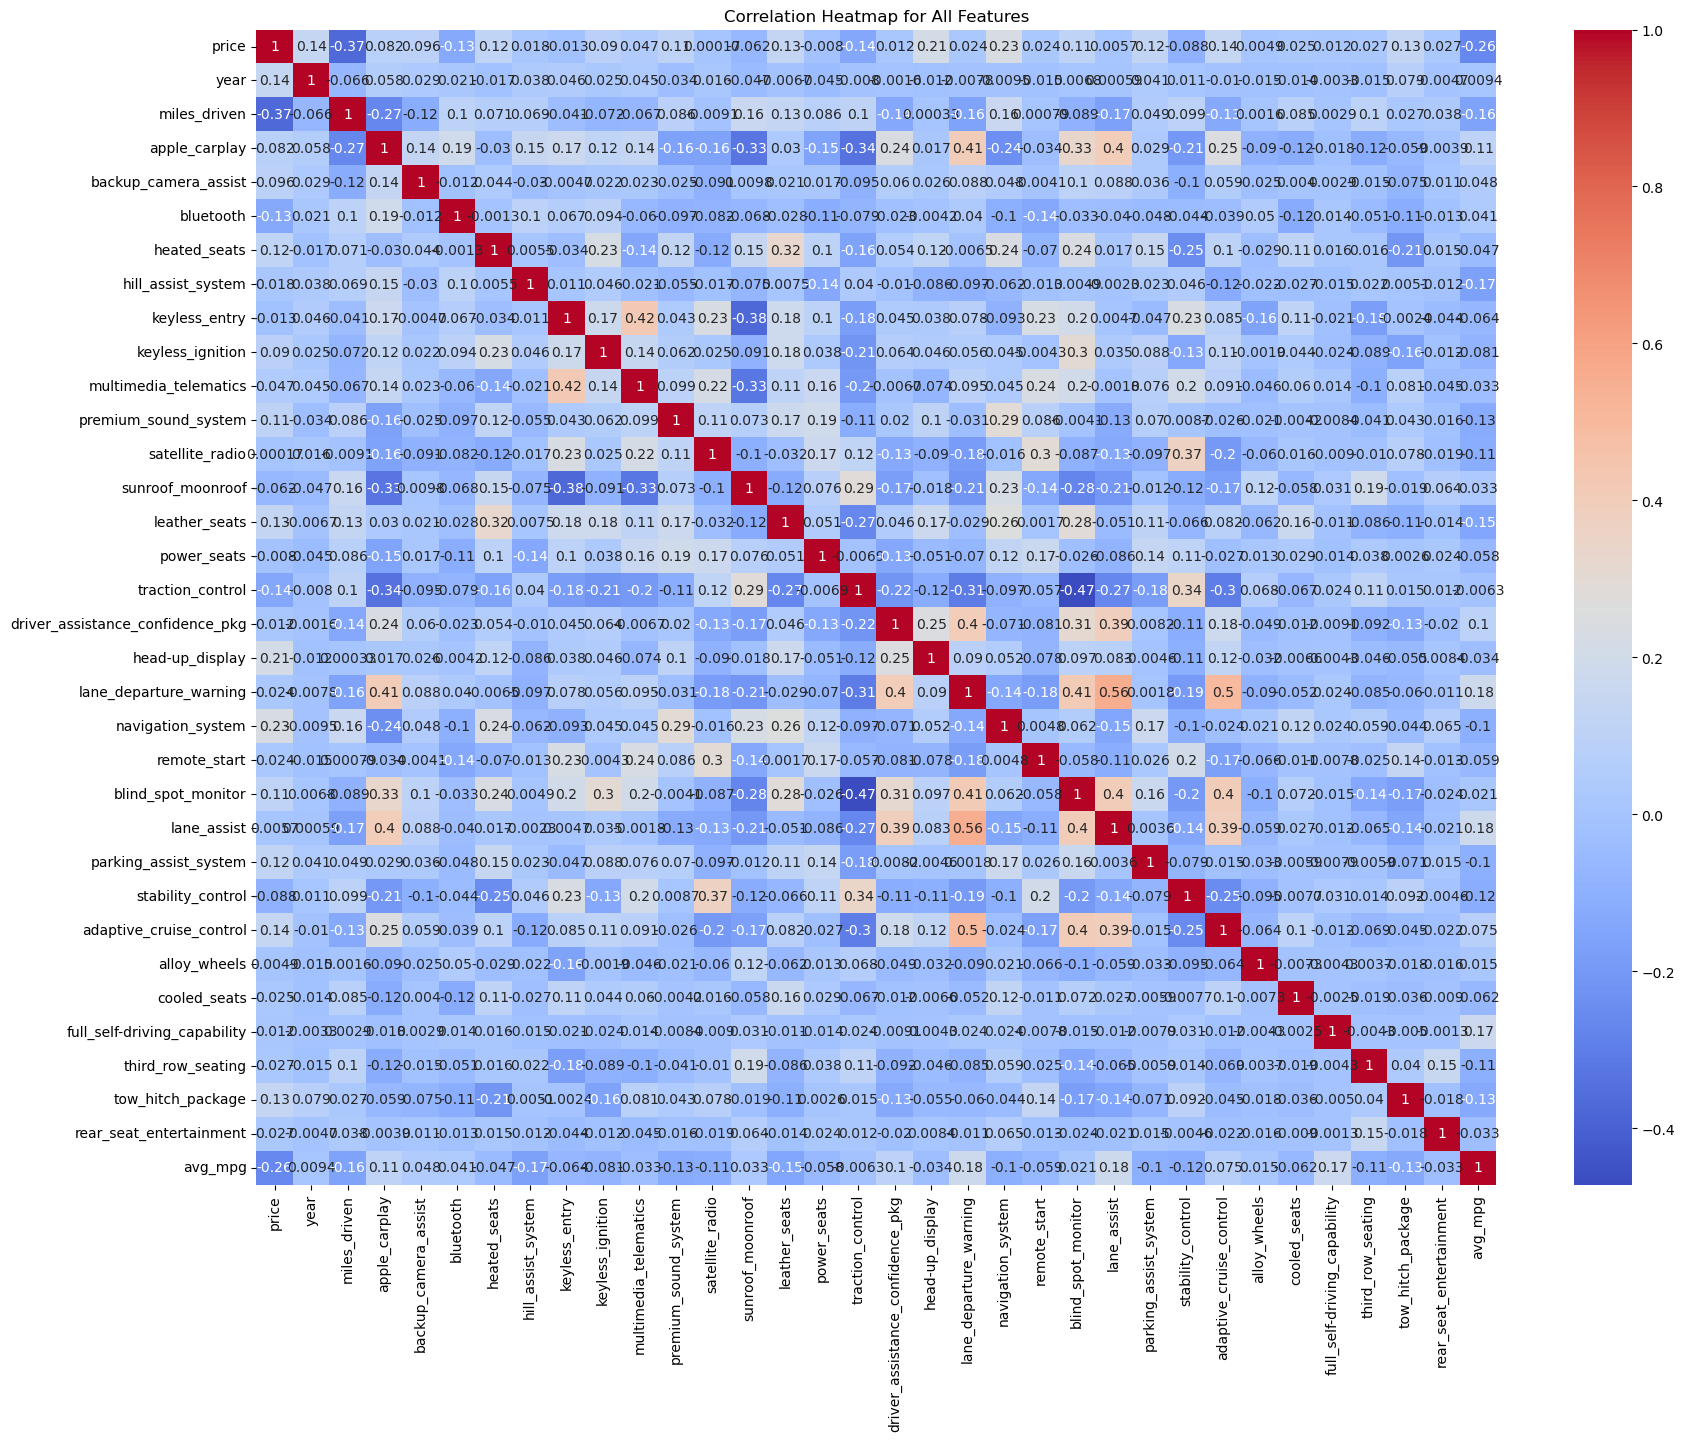

In [105]:
# Correlation heatmap for all features
correlation_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for All Features')
plt.show()

This image displays a correlation heatmap for various car features and how they relate to the car's price, among other factors. In such a heatmap, a correlation of 1 indicates a perfect positive correlation (as one variable increases, the other does too), -1 indicates a perfect negative correlation (as one variable increases, the other decreases), and 0 indicates no correlation.

Here are some insights:

1. **Price Correlations**:
   - **Year**: Moderately positive correlation (0.14) suggests newer cars tend to be more expensive.
   - **Miles Driven**: Strong negative correlation (-0.37) implies that cars with more miles tend to be less expensive, which aligns with standard expectations.
   - **Avg MPG**: There's a moderate negative correlation (-0.29) with price, which might indicate that cars with higher fuel efficiency are not necessarily the most expensive ones; this could be skewed by luxury and performance cars that have lower mpg but high prices.

2. **Feature Correlations**:
   - High positive correlations between features like apple_carplay, backup_camera_assist, and bluetooth suggest that these tend to be offered together in vehicles.
   - Driver assistance features like lane_assist, blind_spot_monitor, and adaptive_cruise_control have moderate positive correlations with each other, indicating these tend to be bundled as part of advanced safety packages.

3. **Fuel Efficiency Correlations**:
   - Avg MPG has a strong positive correlation with features like apple_carplay (0.09) and backup_camera_assist (0.08), which might indicate these features are more common in newer, more efficient vehicles.

4. **Inter-feature Correlations**:
   - There is a very strong positive correlation between certain pairs of features such as between remote_start and heated_seats (0.8), or between multimedia_telematics and premium_sound_system (0.9). This suggests that these features often come together in certain trims or luxury packages.

5. **Negligible or No Correlation**:
   - Some features like leather_seats and sunroof/moonroof have very little to no correlation with other features, suggesting that these are optional and not tied to any specific package or other features.

Overall, this heatmap helps to identify which features contribute to the cost of a car, which features are commonly found together, and potentially, which features to look for depending on a buyer's preference for newer, more fuel-efficient, or feature-rich vehicles. It also helps in understanding the complex interplay of features and their collective impact on vehicle pricing.